<a href="https://colab.research.google.com/github/carlosmvond/modelos_predictivos/blob/main/Clase_22_octubre_DDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

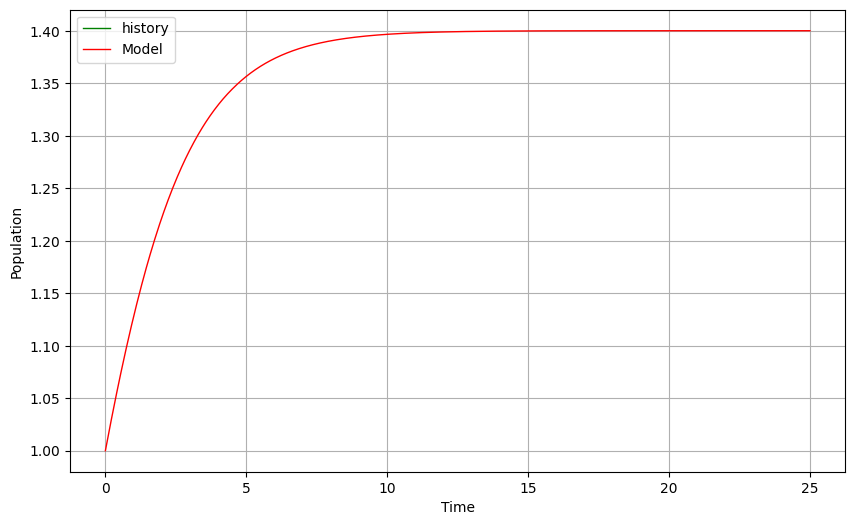

In [20]:
#Simulation of the logistic growth equation with delay

#!pip install ddeint

import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint


# Parameters
r = 0.5  # Intrinsic growth rate
K = 1.4  # Carrying capacity
T = 0   # Delay


# Logistic DDE equation
def equation(Y, t):
    return r * Y(t) * (1 - Y(t-T) / K)

#A=0.5
# Initial history functions
def initial_history_func(t):
    #return 0.1*np.ones_like(t)
    return 1*np.exp(r*t)
    #return A*(np.sin(2*3.14*(t-2.3*T)/(4*T)))+K

# Time span for simulation
ts = np.linspace(0, 25, 2000)
ys = ddeint(equation, initial_history_func, ts)
# Plot

plt.figure(figsize=(10, 6))

#plot of historical function
thist=np.linspace(-T, 0, 20)
hist=initial_history_func(thist)
plt.plot(thist, hist, color='green', linewidth=1, label='history')
plt.plot(ts, ys, color='red', linewidth=1, label='Model')

# Add labels
# Add labels and title
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()

# Show the plot
plt.show()

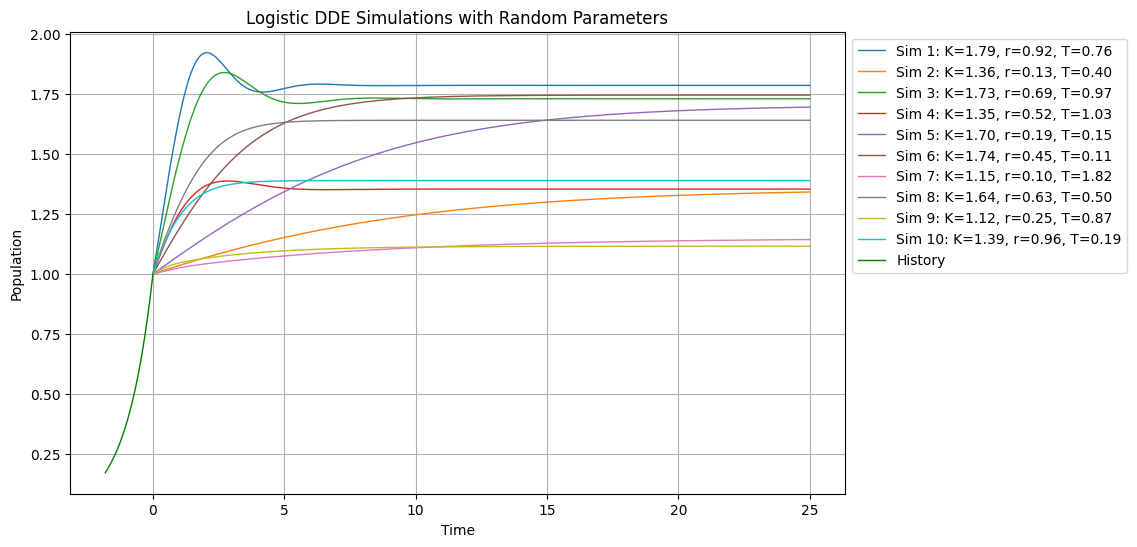

In [21]:

# Parameters for random sampling
num_simulations = 10
K_samples = np.random.uniform(1.0, 2.0, num_simulations)  # K sampled from (1.0, 2.0)
r_samples = np.random.uniform(0.1, 1.0, num_simulations)   # r sampled from (0.1, 1.0)
T_samples = np.random.uniform(0.1, 2.0, num_simulations)   # T sampled from (0.1, 2.0)

# Time span for simulation
ts = np.linspace(0, 25, 2000)

# Plotting
plt.figure(figsize=(10, 6))


for i in range(num_simulations):
    K = K_samples[i]
    r = r_samples[i]
    T = T_samples[i]

    # Solve the DDE
    ys = ddeint(equation, initial_history_func, ts)

    # Plot the results
    plt.plot(ts, ys, linewidth=1, label=f'Sim {i+1}: K={K:.2f}, r={r:.2f}, T={T:.2f}')

# Add historical function for reference
thist = np.linspace(-max(T_samples), 0, 20)
hist = initial_history_func(thist)
plt.plot(thist, hist, color='green', linewidth=1, label='History')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic DDE Simulations with Random Parameters')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.grid()

# Show the plot
plt.show()


In [ ]:
!pip install ddeint